# Homework 3: Exoplanets

### Name: Males-Araujo Yorlan
The homework should be submitted as a python notebook. Please email the homework to hdenes@yachaytech.edu.ec by the <b>end of the day (midnight) by the $8$th of December.</b>

## Analysing properties of exoplanets

The goal of this exercise is to analyse overall properties of exoplanets based on the data from the European exoplanet data base: http://exoplanet.eu/catalog/ Statistical studies of exoplanets and the properties of their host stars are critical for understanding planet formation.

#### 1. Download the relevant data. You can do this by either downloading the full catalogue from the website or trough python using ADQL commands. 

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# Read the file
planets = pd.read_csv("./Data/planets.csv")

In [3]:
# Information
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355 entries, 0 to 7354
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        7355 non-null   object 
 1   planet_status               7355 non-null   object 
 2   mass                        4401 non-null   float64
 3   mass_error_min              3694 non-null   float64
 4   mass_error_max              3694 non-null   float64
 5   mass_sini                   1396 non-null   float64
 6   mass_sini_error_min         1139 non-null   float64
 7   mass_sini_error_max         1139 non-null   float64
 8   radius                      4933 non-null   float64
 9   radius_error_min            4348 non-null   float64
 10  radius_error_max            4348 non-null   float64
 11  orbital_period              6073 non-null   float64
 12  orbital_period_error_min    5325 non-null   float64
 13  orbital_period_error_max    5325 

Most columns contain null values.

In [4]:
# Brief check
planets.head()

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,5.7430,0.28900,0.28900,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.000,80.000,NaN,NaN,HD 10697
1,112 Psc b,Confirmed,0.0330,0.00500,0.00500,0.0330,0.00500,0.00500,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
2,112 Psc c,Confirmed,9.8660,1.78100,1.78100,NaN,NaN,NaN,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
3,11 Com Ab,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8III,NaN,NaN,NaN,4742.0,100.000,100.000,NaN,NaN,HD 107383
4,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.000,70.000,NaN,NaN,NaN


#### 2. Make sure that you only have relevant data for planets. For this, think about the definition of a planet and exclude all data that does not satisfy the definition. Briefly describe your decision about excluding irrelevant data.

The dataset contains a column with information on its status.

In [5]:
# Status
print(np.unique(planets.iloc[:,1]))

['Confirmed']


It says all are confirmed to be planets, which is not useful. 

We know the mass upper limit for planets is $13$ Jupiter masses before they start getting considered as brown dwarfs, so let's use that.

In [6]:
# First let's drop all the nans
planets = planets.dropna(subset=['mass'])

# Maximum mass
planets_2 = planets[planets["mass"] < 13]

In addition, we can also use the eccentricity *in combination* with the mass lower limit mass to get rid of possible asteroids and comets. 

For the mass limit, we'll use the asteroid Ceres $(\sim 1.3 \times 10^{-7}\, \rm M_{Jup})$ and $0.5$ as eccentricity. Hopefully, we'll select most planets.

In [7]:
# Minimum mass and eccentricity
relevant = planets_2[(planets_2["mass"] > 1e-7) & (planets_2["eccentricity"] < 0.5)]

In [8]:
# We are left with this many planets
relevant.shape[0]

2083

#### 3. Make a scatter plot of *semi-major axis* vs. *calculated temperature*. Also, make histograms of both semi-major axis and temperature.

In [9]:
# Set the style
plt.style.use(["science", "notebook", "no-latex"])

##### Scatter plot

/tmp/ipykernel_71921/496864242.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-0.2,3)


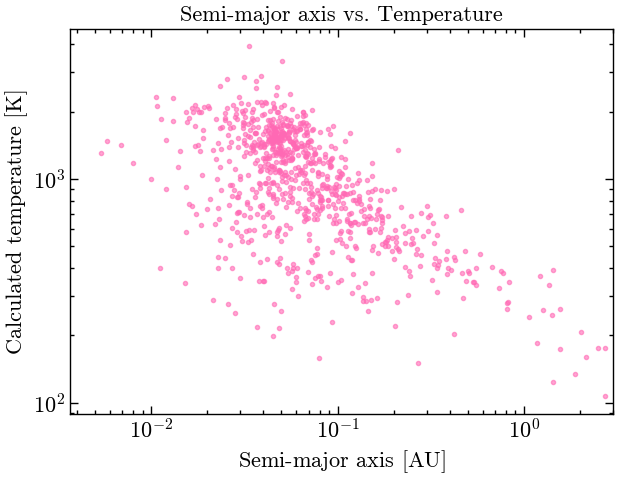

In [10]:
# Plot
plt.figure(figsize = (7, 5))
plt.scatter(relevant["semi_major_axis"], relevant["temp_calculated"],
            marker = ".", color = 'hotpink', alpha = 0.6)

plt.title("Semi-major axis vs. Temperature")
plt.xlabel("Semi-major axis [$\\rm AU$]")
plt.ylabel("Calculated temperature [K]")

plt.loglog()

plt.xlim(-0.2,3)
plt.show()
plt.close()

##### Histograms

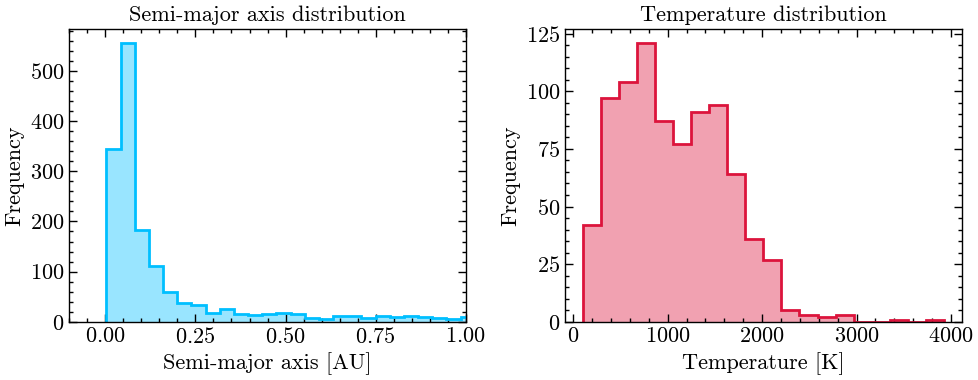

In [11]:
# Two-panel figure
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Mass
axes[0].hist(relevant[relevant["semi_major_axis"] < 5]["semi_major_axis"],
             bins = 125, color='deepskyblue', histtype = "step", lw = 2)
axes[0].hist(relevant[relevant["semi_major_axis"] < 5]["semi_major_axis"],
             bins = 125, color='deepskyblue', histtype = "stepfilled", lw = 2,
             alpha = 0.4)
axes[0].set_title("Semi-major axis distribution")
axes[0].set_xlabel("Semi-major axis [AU]")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(-0.1, 1)

# Temperature
axes[1].hist(relevant["temp_calculated"], bins = 20, color = 'crimson', histtype = "step", lw = 2)
axes[1].hist(relevant["temp_calculated"], bins = 20, color = 'crimson', histtype = "stepfilled", lw = 2, alpha = 0.4)
axes[1].set_title("Temperature distribution")
axes[1].set_xlabel("Temperature [K]")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 4. What can you conclude from the plots in 3? Is there a relation between the two parameters? Briefly explain what is the reason for the relation if there is one.

Most exoplanets in the data I filtered are much closer to their star than the Earth to the Sun, and the temperature can reach up to to $2000\,\rm K$ (and more) because of it. Nonetheless, a great portion of them seem to have temperatures lower than $1000\,\rm K$.

**There is a relation**. In general, it seems like the closer the planet to the star, the higher the temperature it has. However, that changes (I assume) depending on the temperature of the star since the variation in temperature for close planets is large. 

#### 5. Make a scatter plot of *effective temperature of the host star* vs. *planetary mass*. Make histograms of both quantities. 

##### Scatter plot

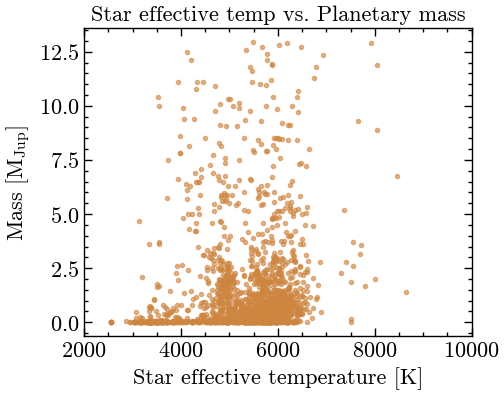

In [12]:
# Plot
plt.figure(figsize = (5, 4))
plt.scatter(relevant["star_teff"], relevant["mass"],
            marker = ".", color = 'peru', alpha = 0.6)

plt.title("Star effective temp vs. Planetary mass")
plt.xlabel("Star effective temperature [K]")

plt.ylabel("Mass [$\\rm M_{Jup}$]")
plt.xlim(2000, 10000)

plt.show()
plt.close()

##### Histograms

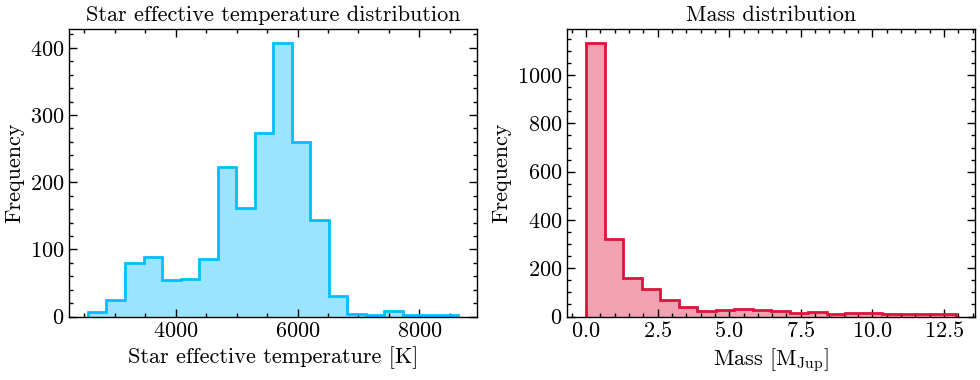

In [13]:
# Two-panel figure
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Star temp
axes[0].hist(relevant[relevant["star_teff"] < 10000]["star_teff"], bins = 20,
             color = 'deepskyblue', histtype = "step", lw = 2)
axes[0].hist(relevant[relevant["star_teff"] < 10000]["star_teff"], bins = 20,
             color = 'deepskyblue', histtype = "stepfilled", lw = 2, alpha = 0.4)
axes[0].set_title("Star effective temperature distribution")
axes[0].set_xlabel("Star effective temperature [K]")
axes[0].set_ylabel("Frequency")

# Mass
axes[1].hist(relevant["mass"], bins = 20, color = 'crimson', histtype = "step", lw = 2)
axes[1].hist(relevant["mass"], bins = 20, color = 'crimson', histtype = "stepfilled", lw = 2, alpha = 0.4)
axes[1].set_title("Mass distribution")
axes[1].set_xlabel("Mass [$\\rm M_{Jup}$]")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 6. Describe the plots that you created in 5. What can you conclude from these plots? Briefly explain your conclusions. 

About the star effective temperature vs. planetary mass plot, there does not seem to be a strong correlation between them. Something we can conclude is that most exoplanets are found in stars whose temperatures are between $4500 \,\rm K-6500\,\rm K$, and they are below $\sim 1\,\rm M_{Jup}$, which is also confirmed by the histograms. Exoplanets above $\sim 3 \, \rm M_{Jup}$ are rare.

#### 7. In class we discussed that planets, in particular gas giants, are more common around metal rich stars. Can you show some evidence for this using histograms, scatter plots and number counts? **Tip**: You may want to select specific data for this.

According to Wikipedia, the star metallicity is measured with the ratio
$$
\left[\frac{\rm Fe}{\rm H}\right] = \log_{10} \left(\frac{N_{\rm Fe}}{N_{\rm H}}\right)_{\star} - \log_{10} \left(\frac{N_{\rm Fe}}{N_{\rm H}}\right)_{\odot},
$$
where $\star$ denotes the star. We can take anything above $0$ as metal rich.

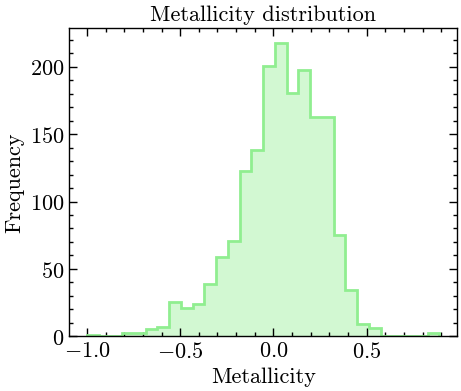

In [14]:
# Let's see the distribution
plt.figure(figsize = (5,4))
plt.title("Metallicity distribution")

plt.hist(relevant["star_metallicity"], bins = 30, color = 'lightgreen', histtype = "step", lw = 2)
plt.hist(relevant["star_metallicity"], bins = 30, color = 'lightgreen', histtype = "stepfilled", lw = 2, alpha = 0.4)

plt.xlabel("Metallicity")
plt.ylabel("Frequency")
plt.show()
plt.close()

We proceed to select the metall rich ones.

In [15]:
# As done above
metal_rich = relevant[relevant["star_metallicity"] > 0]

So that now we can check two things:

- The amount of gas giants around them (large radii)
- The number of planets around metal rich stars

##### Gas giants

The radius lower limit for gas giants is around $6$ times that of Earth, which is approximately $0.54\,\rm R_{Jup}$.

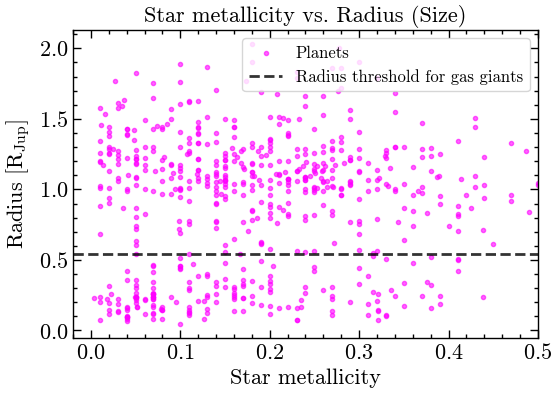

In [16]:
# Scatter plot
plt.figure(figsize = (6,4))
plt.title("Star metallicity vs. Radius (Size)")

# Scatter
plt.scatter(metal_rich["star_metallicity"], metal_rich["radius"], marker = ".",
            color = "magenta", label = "Planets", alpha = 0.6)

# Line at 0.54
plt.axhline(0.54, color = "k", ls = "--", alpha = 0.8, lw = 2, label = "Radius threshold for gas giants")

plt.xlabel("Star metallicity")
plt.ylabel("Radius [$\\rm R_{Jup}$]")

plt.legend(frameon = True, fontsize = 12)
plt.xlim(-0.02,0.5)
plt.show()

We can see that most planets do lie above the threshold, so this supports that gas giants are common in metal rich stars.

##### Number of planets

To know how many planets they have, we just have to count the number of total stars and the numbers of stars without repetition.

In [17]:
# Select the star names
stars_names_mr = metal_rich["star_name"]

In [18]:
# Number of total elements
total_stars = stars_names_mr.shape[0]

# Number of total elements without repetition
total_unique_stars = np.unique(stars_names_mr).shape[0]

In [19]:
# Report
print(f"There are {(total_stars/total_unique_stars):.2} planets per metal rich star.")

There are 1.3 planets per metal rich star.


#### 8. Briefly explain and describe what you found based on the plots in 7. 

The metallicity distribution seems almost normal around $0$, and gas giants do appear to be more common in metal rich stars. Also, given the average number of planets per star is about $\sim 1$, then, exoplanets, in general, are also more frequent in this kind of stars since the average we found is $1.3$.

#### 9. Make a scatter plot of *mass* vs. *radius*. Make sure to have both axes in log scale. 

In [20]:
# Get the log10 of both
mass_log = np.log10(relevant["mass"])
radius_log = np.log10(relevant["radius"])

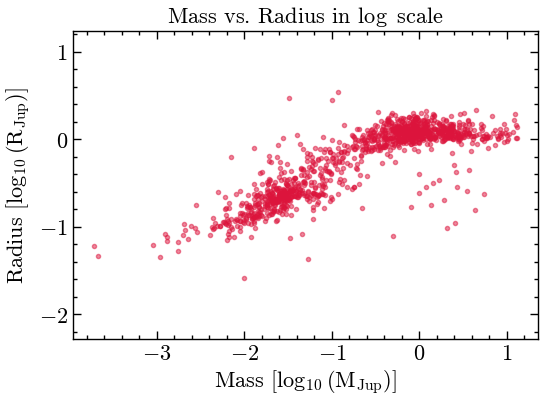

In [21]:
# Plot
plt.figure(figsize = (6,4))
plt.scatter(mass_log, radius_log, marker = ".", color = "crimson", alpha = 0.5)
plt.gca().set_aspect('equal', adjustable='datalim') 

plt.title("Mass vs. Radius in $\\log$ scale")
plt.xlabel("Mass [$\\log_{10}(\\rm M_{Jup})$]")
plt.ylabel("Radius [$\\log_{10}(\\rm R_{Jup})$]")
plt.show()
plt.close()

#### 10. There is a known gap in the radius of planets. Can you find where this gap is in the plot from 9? Is there also a gap in the mass of planets? What does this suggest? 

Yes, the gap appears to be centered at radius $\sim -0.25$ and mass $\sim -0.9$ in $\log_{10}$ scale, which correspond to $0.56\,\rm R_{Jup}$ and $0.13\,\rm M_{Jup}$. It suggests that planets tend to form in two distinct size populations: rocky planets below the gap and gaseous ones above the gap.

#### 11. Is there anything else that you can conclude from 9? Mark where the gap is, you can use a square or a circle on the figure. Briefly explain your observation. 

Perhaps something else we can mention is that the fact that this appears as a clear division rather than a smooth distribution suggests this is a fundamental physical process in planetary evolution. On top of that, the plot is in $\log_{10}$ scale, so the gap is huge.

##### Gap

In [22]:
# Library we're going to use
from shapely.geometry import Point

In [23]:
# Create the circle
x, y, radius = -0.9, -0.25, 0.35
circle = Point(x, y).buffer(radius)

# Plot the circle
x_circle, y_circle = circle.exterior.xy

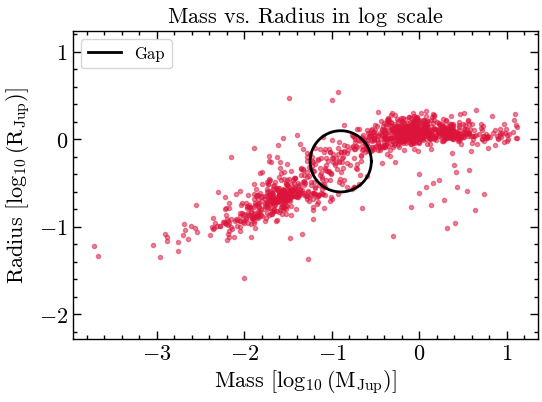

In [24]:
# Plot
plt.figure(figsize = (6,4))

# Plot
plt.scatter(mass_log, radius_log, marker = ".", color = "crimson",
            alpha = 0.5)
plt.gca().set_aspect('equal', adjustable='datalim') 

# Circle
plt.plot(x_circle, y_circle, color = "k", ls = "-", label = "Gap")

plt.title("Mass vs. Radius in $\\log$ scale")
plt.xlabel("Mass [$\\log_{10}(\\rm M_{Jup})$]")
plt.ylabel("Radius [$\\log_{10}(\\rm R_{Jup})$]")

plt.legend(loc = 2,frameon = True, fontsize = 12)
plt.show()
plt.close()

#### 12. Calculate the density of the exoplanets and make a histogram. Compare the histogram with the density of Earth and Jupiter. What do you find?

Assuming the exoplanets as spheres, the density can be found with
$$
\rho = \frac{3\,m}{4\,\pi\, r^{3}},
$$
where $m$ is the mass and $r$ is the radius.

In [25]:
# Make a copy
relevant_copy = relevant.copy()

In [26]:
# Remove the ones which contain radius = NaN
relevant_clean = relevant_copy.dropna(subset=['radius'])

In [27]:
# Create a simple function
get_density = lambda m, r: (3*m)/(4*np.pi*r**3)

In [28]:
# And then
rho = get_density(relevant_clean["mass"], relevant_clean["radius"])

In [29]:
# Check there are no NaN's
rho.info()

<class 'pandas.core.series.Series'>
Index: 1167 entries, 0 to 7334
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1167 non-null   float64
dtypes: float64(1)
memory usage: 18.2 KB


The density of Earth and Jupiter need to be obtained in terms of Jupiter's mass and radius.

In [30]:
# Densities
rho_earth = get_density(0.00314, 0.089)
rho_jupiter = get_density(1, 1)

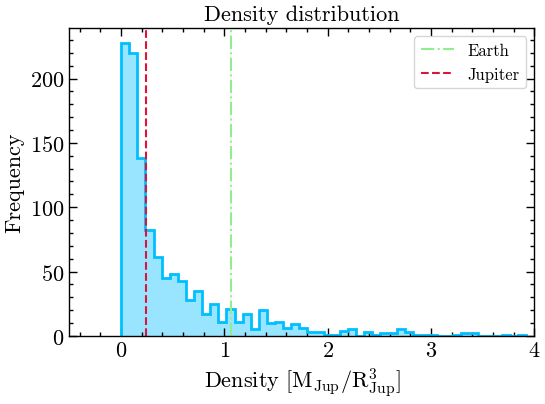

In [31]:
# Histogram
plt.figure(figsize = (6,4))

# Distribution
plt.title("Density distribution")
plt.hist(rho[rho < 4], bins = 50, color = 'deepskyblue',
         histtype = "stepfilled", lw = 2, alpha = 0.4)
plt.hist(rho[rho < 4], bins = 50, color='deepskyblue',
         histtype='step', lw=2)

# Earth and Jupiter
plt.axvline(rho_earth, color = 'lightgreen', lw = 1.5, label = "Earth", ls = "-.")
plt.axvline(rho_jupiter, color = "crimson", lw = 1.5, label = "Jupiter", ls = '--')

plt.xlabel("Density [$\\rm M_{Jup}/R^{3}_{Jup}$]")
plt.ylabel("Frequency")

plt.xlim(-0.5,4)

plt.legend(frameon = True, fontsize = 12)
plt.show()
plt.close()

Few planets are denser than the Earth (since it's rocky) and a large amount of them have low densities (comparable to that of Jupiter).

#### 13. Where are planets found? Plot the on sky position (R.A. and Dec) of all known exoplanets. What can you conclude from this?

In [32]:
# Remove all the NaN's from those columns
relevant_clean_2 = relevant_copy.dropna(subset=['ra', 'dec'])

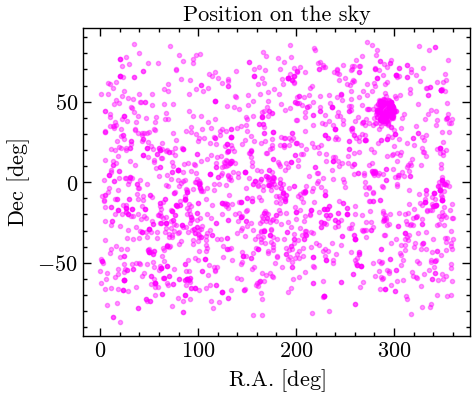

In [33]:
# Plot
plt.figure(figsize = (5,4))

plt.scatter(relevant_clean_2["ra"], relevant_clean_2["dec"],
            marker = ".", alpha = 0.4, color = "magenta")

plt.title("Position on the sky")
plt.xlabel("R.A. [$\\rm deg$]")
plt.ylabel("Dec [$\\rm deg$]")

plt.show()
plt.close()

Planets appear evenly distributed in *our sky*, although the $\rm Dec$ angle is limited between $-100$ and $100$ $\rm deg$. There is a higher density region at approximately $[300, 50] \,\rm deg$.

#### 14. Plot histograms of the host stars distance, mass and temperature. 

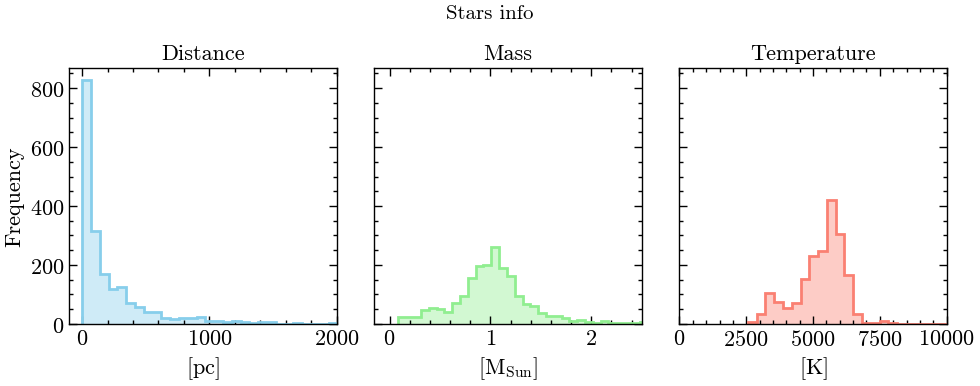

In [34]:
# Three-panel figure
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey = True)
fig.suptitle("Stars info", fontsize = 15)

axs[0].hist(relevant["star_distance"], bins = 120,
            color = 'skyblue', histtype = "step", lw = 2)
axs[0].hist(relevant["star_distance"], bins = 120,
            color = 'skyblue', histtype = "stepfilled", alpha = 0.4)
axs[0].set_title("Distance")
axs[0].set_xlabel("[$\\rm pc$]")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(-100, 2000)

axs[1].hist(relevant["star_mass"], bins = 70,
            color = 'lightgreen', histtype = "step", lw = 2)
axs[1].hist(relevant["star_mass"], bins = 70,
            color = 'lightgreen', histtype = "stepfilled", alpha = 0.4)
axs[1].set_title("Mass")
axs[1].set_xlabel("[$\\rm M_{Sun}$]")
axs[1].set_xlim(-0.15, 2.5)

axs[2].hist(relevant["star_teff"], bins = 120,
            color = 'salmon', histtype = "step", lw = 2)
axs[2].hist(relevant["star_teff"], bins = 120,
            color = 'salmon', histtype = "stepfilled", alpha = 0.4)
axs[2].set_title("Temperature")
axs[2].set_xlabel("[$\\rm K$]")
axs[2].set_xlim(0, 10000)

plt.tight_layout()
plt.show()

#### 15. What can you conclude from the plots in 13 and 14? Are these conclusions physically meaningful or the result of some bias? 

We found that discovered explanets seem to be evenly spread in the sky, but also that most stars we have able to look at are relatively close to us (the majority is not beyond $1\,\rm kpc$), and their masses and temperatures are more or less comparable to those of the sun. 

We need to be careful and explore more before generalizing from our current small and close sample of exoplanets because it may indeed be biased. However, I think the fact that many stars close to us have planets has physical significance because it might suggest that planet formation is a common process.

---

Thank you a lot for everything, prof. Helga.

🐱🪻